In [ ]:
!pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.3 MB/s eta 0:00:00a 0:00:01


In [5]:
from skfuzzy import control as ctrl
import numpy as np
import skfuzzy as fuzz

condition_severity = ctrl.Antecedent(np.arange(0, 101, 1), 'condition_severity')
symptom_relevance = ctrl.Antecedent(np.arange(0, 101, 1), 'symptom_relevance')
recommendation = ctrl.Consequent(np.arange(0, 101, 1), 'recommendation')

condition_severity['low'] = fuzz.trapmf(condition_severity.universe, [0, 0, 30, 50])
condition_severity['medium'] = fuzz.trimf(condition_severity.universe, [30, 50, 70])
condition_severity['high'] = fuzz.trapmf(condition_severity.universe, [50, 70, 100, 100])

symptom_relevance['low'] = fuzz.trapmf(symptom_relevance.universe, [0, 0, 30, 50])
symptom_relevance['medium'] = fuzz.trimf(symptom_relevance.universe, [30, 50, 70])
symptom_relevance['high'] = fuzz.trapmf(symptom_relevance.universe, [50, 70, 100, 100])

recommendation['routine'] = fuzz.trapmf(recommendation.universe, [0, 0, 30, 50])
recommendation['priority'] = fuzz.trimf(recommendation.universe, [30, 50, 70])
recommendation['urgent'] = fuzz.trapmf(recommendation.universe, [50, 70, 100, 100])

rule1 = ctrl.Rule(condition_severity['high'] & symptom_relevance['high'], recommendation['urgent'])
rule2 = ctrl.Rule(condition_severity['medium'] & symptom_relevance['medium'], recommendation['priority'])
rule3 = ctrl.Rule(condition_severity['low'] & symptom_relevance['low'], recommendation['routine'])

recommendation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])




In [9]:
recommendation_sim = ctrl.ControlSystemSimulation(recommendation_ctrl)
recommendation_sim.input['condition_severity'] = 80
recommendation_sim.input['symptom_relevance'] = 70
recommendation_sim.compute()

print(recommendation_sim.output['recommendation'])

79.58333333333333


In [13]:
import os

# Define the path where .hea files are stored
hea_files_directory = '../pred_res/input_data/train'
attribute_counts = {"Dx": 0, "Rx": 0, "Hx": 0, "Sx": 0}

# Loop through all .hea files in the directory
for filename in os.listdir(hea_files_directory):
    if filename.endswith('.hea'):
        # Open and read the file
        with open(os.path.join(hea_files_directory, filename), 'r') as file:
            content = file.read()
            
            # Check for the presence of each attribute
            if "#Dx: Unknown" not in content:
                attribute_counts["Dx"] += 1
            if "#Rx: Unknown" not in content:
                attribute_counts["Rx"] += 1
            if "#Hx: Unknown" not in content:
                attribute_counts["Hx"] += 1
            if "#Sx: Unknown" not in content:
                attribute_counts["Sx"] += 1

# Print the count of files with each attribute
print("Presence of attributes across .hea files:")
for attribute, count in attribute_counts.items():
    print(f"{attribute}: {count} files")

# Optional: Print total files processed for context
total_files = len([f for f in os.listdir(hea_files_directory) if f.endswith('.hea')])
print(f"Total .hea files processed: {total_files}")

Presence of attributes across .hea files:
Dx: 38788 files
Rx: 0 files
Hx: 0 files
Sx: 0 files
Total .hea files processed: 38788


In [14]:
!nvidia-smi

Sun Oct 27 01:46:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A10                     On  | 00000000:81:00.0 Off |                    0 |
|  0%   36C    P0              62W / 150W |  17624MiB / 23028MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import pandas as pd
# Get top record from predictions.csv
top_record = pd.read_csv('predictions_2.csv', header=0, nrows=20)
print("Top record from predictions.csv:")
print(top_record)

Top record from predictions.csv:
       filename  10370003_label  111975006_label  164889003_label  \
0    E03065.mat               0                0                0   
1    E03604.mat               0                1                0   
2   HR15478.mat               0                0                1   
3     A3309.mat               0                0                1   
4     A2844.mat               0                1                0   
5    E08660.mat               0                0                0   
6   HR13646.mat               0                0                0   
7   HR13474.mat               0                0                0   
8     Q0903.mat               0                0                0   
9     Q2567.mat               0                0                0   
10    A2606.mat               0                0                0   
11    A3498.mat               0                0                0   
12   E07597.mat               0                1                0   
1

In [3]:
from collections import defaultdict
record_dict = defaultdict(dict)
record_dict1 = defaultdict(lambda:defaultdict(dict))

In [4]:
for _, row in top_record.iterrows():
    filename = row['filename']
    for key, value in row.items():
        if key != 'filename':
            record_key = key.split('_')
            record_dict1[filename][record_key[0]][record_key[1]] = value
    # record_dict1[filename] = row

record_dict1

defaultdict(<function __main__.<lambda>()>,
            {'E03065.mat': defaultdict(dict,
                         {'10370003': {'label': 0, 'score': 1.5029952e-05},
                          '111975006': {'label': 0, 'score': 0.039709084},
                          '164889003': {'label': 0, 'score': 0.00019273772},
                          '164890007': {'label': 0, 'score': 3.030816e-05},
                          '164909002': {'label': 0, 'score': 2.0280431e-05},
                          '164917005': {'label': 0, 'score': 0.014078175},
                          '164934002': {'label': 0, 'score': 0.00031337465},
                          '164947007': {'label': 0, 'score': 3.7260636e-06},
                          '251146004': {'label': 0, 'score': 0.017095322},
                          '270492004': {'label': 0, 'score': 0.00013251675},
                          '284470004': {'label': 0, 'score': 0.0029167107},
                          '39732003': {'label': 0, 'score': 0.044964742},

In [5]:
for key, value in top_record.iloc[0].items():
    if key != 'filename':
        record_key = key.split('_')
        record_dict[record_key[0]][record_key[1]] = value
    else:
        record_dict[key] = value

record_dict

defaultdict(dict,
            {'filename': 'E03065.mat',
             '10370003': {'label': 0, 'score': 1.5029952e-05},
             '111975006': {'label': 0, 'score': 0.039709084},
             '164889003': {'label': 0, 'score': 0.00019273772},
             '164890007': {'label': 0, 'score': 3.030816e-05},
             '164909002': {'label': 0, 'score': 2.0280431e-05},
             '164917005': {'label': 0, 'score': 0.014078175},
             '164934002': {'label': 0, 'score': 0.00031337465},
             '164947007': {'label': 0, 'score': 3.7260636e-06},
             '251146004': {'label': 0, 'score': 0.017095322},
             '270492004': {'label': 0, 'score': 0.00013251675},
             '284470004': {'label': 0, 'score': 0.0029167107},
             '39732003': {'label': 0, 'score': 0.044964742},
             '426177001': {'label': 0, 'score': 0.0023904901},
             '426627000': {'label': 0, 'score': 3.15866e-06},
             '426783006': {'label': 1, 'score': 0.8313262},
  

Good enough metric

In [37]:
from math import log, tanh
for key, value in record_dict.items():
    if key != 'filename':
        try:
            label = value.get('label')
            score = value.get('score')
            score = max(min(score, 1 - 1e-15), 1e-15)
            score = score ** 0.4
            log_odds = log(score / (1 - score))
            record_dict[key]["strength"] = tanh(log_odds) if label == 1 else tanh(-log_odds)
        except KeyError:
            print(f"{key}: {value}")

record_dict

defaultdict(dict,
            {'filename': 'E03065.mat',
             '10370003': {'label': 0,
              'score': 1.5029952e-05,
              'strength': 0.9997163266376311},
             '111975006': {'label': 0,
              'score': 0.039709084,
              'strength': 0.7481286867111653},
             '164889003': {'label': 0,
              'score': 0.00019273772,
              'strength': 0.9977230768337799},
             '164890007': {'label': 0,
              'score': 3.030816e-05,
              'strength': 0.9994990322338348},
             '164909002': {'label': 0,
              'score': 2.0280431e-05,
              'strength': 0.9996384107814735},
             '164917005': {'label': 0,
              'score': 0.014078175,
              'strength': 0.9059927221170447},
             '164934002': {'label': 0,
              'score': 0.00031337465,
              'strength': 0.9965935913898872},
             '164947007': {'label': 0,
              'score': 3.7260636e-06,
    

In [15]:
record_dict

defaultdict(dict,
            {'filename': 'E03065.mat',
             '10370003': {'label': 0,
              'score': 1.5029952e-05,
              'strength': 0.9999697061170598},
             '111975006': {'label': 0,
              'score': 0.039709084,
              'strength': 0.8833587353599633},
             '164889003': {'label': 0,
              'score': 0.00019273772,
              'strength': 0.9996036729156481},
             '164890007': {'label': 0,
              'score': 3.030816e-05,
              'strength': 0.9999387125856847},
             '164909002': {'label': 0,
              'score': 2.0280431e-05,
              'strength': 0.9999590721709382},
             '164917005': {'label': 0,
              'score': 0.014078175,
              'strength': 0.9643975093939728},
             '164934002': {'label': 0,
              'score': 0.00031337465,
              'strength': 0.9993506682179448},
             '164947007': {'label': 0,
              'score': 3.7260636e-06,
    

In [1]:
from owlready2 import *
from owlready2.pymedtermino2 import *
from owlready2.pymedtermino2.umls import *

default_world.set_backend(filename="pym.sqlite3")

In [49]:
import_umls("umls-2024AA-metathesaurus-full.zip", terminologies=["SNOMEDCT_US"])
default_world.save()

Importing UMLS from umls-2024AA-metathesaurus-full.zip with Python version 3.11.7 and Owlready version 2-0.47...
  Parsing 2024AA/META/MRRANK.RRF as MRRANK
  Parsing 2024AA/META/MRCONSO.RRF as MRCONSO
  Parsing 2024AA/META/MRDEF.RRF as MRDEF
  Parsing 2024AA/META/MRREL.RRF as MRREL
  Parsing 2024AA/META/MRSAT.RRF as MRSAT
Breaking ORIG cycles...
    SNOMEDCT_US : 0 cycles found: 
    SRC : 0 cycles found: 
Finalizing only properties and restrictions...
Finalizing CUI - ORIG mapping...
FTS Indexing...


In [2]:
PYM = get_ontology("http://PYM/").load()
SNOMEDCT = PYM["SNOMEDCT_US"]

In [3]:
concept = SNOMEDCT[164917005]

In [4]:
concept

SNOMEDCT_US["164917005"] # EKG: Q wave abnormal

In [5]:
concept.name

'164917005'

In [ ]:
concept.label.first().split(":")[1].strip()

'Q wave abnormal'

In [6]:
concept.synonyms

[locstr('ECG: Q wave abnormal', 'en'),
 locstr('Electrocardiographic Q wave abnormal', 'en'),
 locstr('Electrocardiographic Q wave abnormal (finding)', 'en')]

In [13]:
[str(label).strip() for label in concept.synonyms]

['ECG: Q wave abnormal',
 'Electrocardiographic Q wave abnormal',
 'Electrocardiographic Q wave abnormal (finding)']

In [67]:
concept.terminology

PYM["SNOMEDCT_US"] # US Edition of SNOMED CT

In [19]:
[str(label).split('#')[1].strip() for label in concept.ancestor_concepts()[:3]][1:]

['Electrocardiogram abnormal', 'Electrocardiogram finding']

In [69]:
concept.descendant_concepts()

[SNOMEDCT_US["164917005"] # EKG: Q wave abnormal
]

In [71]:
dir(concept)

['INDIRECT_get_properties',
 '__children',
 '__class__',
 '__classcell__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__label',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__parents',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__synonyms',
 '__terminology',
 '__weakref__',
 '_equivalent_to',
 '_get_instance_possible_relations',
 '_get_is_instance_of',
 '_instance_equivalent_to_changed',
 '_instance_is_a_changed',
 '_name',
 '_set_is_instance_of',
 'differents',
 'entity_class',
 'generate_default_name',
 'get_equivalent_to',
 'get_inverse_properties',
 'get_iri',
 'get_name',
 'get_properties',
 'iri',
 'is_a',
 'is_instance_of',
 'name',
 'namespace',
 'reload',
 'set_equivalent_to',
 'set_iri',
 'set_name',
 'storid']

In [73]:
concept.__terminology()

SRC.snomedct_us1

In [77]:
concept.namespace

get_ontology("http://PYM/").get_namespace("http://PYM/SNOMEDCT_US/")

In [83]:
concept.get_class_properties()

{PYM.has_interpretation,
 PYM.ctv3id,
 PYM.groups,
 PYM.synonyms,
 PYM.definition_status_id,
 PYM.subset_member,
 PYM.interprets,
 PYM.term_type,
 PYM.terminology,
 PYM.type_id,
 rdf-schema.label,
 PYM.case_significance_id,
 PYM.active,
 PYM.effective_time}

In [118]:
list(concept.interprets)[0].label.first().split(":")[0].strip()

'Electrocardiographic procedure'

In [102]:
concept.term_type

['PT', 'SY', 'FN']

In [104]:
concept.definition_status_id

['900000000000074008']

In [106]:
concept.groups

[<Group 129964_1> # interprets=Electrocardiographic procedure ; has_interpretation=Abnormal,
 <Group 129964_2> # interprets=Q wave feature]

In [107]:
concept.label

[locstr('EKG: Q wave abnormal', 'en')]

In [119]:
fsn = concept.fsn[0].name

AttributeError: 'fsn' property is not defined.

In [124]:
concept.get_properties(concept)

{PYM.ctv3id,
 rdf-schema.label,
 PYM.synonyms,
 PYM.definition_status_id,
 PYM.subset_member,
 PYM.term_type,
 PYM.terminology,
 PYM.type_id,
 PYM.case_significance_id,
 PYM.active,
 PYM.effective_time}

In [140]:
for rel in concept.get_properties(concept):
    print(rel)
    for value in rel[concept]:
        print(f"{rel}: {value}")

PYM.effective_time
PYM.effective_time: 20020131
PYM.active
PYM.active: 1
PYM.case_significance_id
PYM.case_significance_id: 900000000000017005
PYM.case_significance_id: 900000000000020002
PYM.type_id
PYM.type_id: 900000000000013009
PYM.type_id: 900000000000003001
PYM.terminology
PYM.terminology: PYM["SNOMEDCT_US"] # US Edition of SNOMED CT

PYM.term_type
PYM.term_type: PT
PYM.term_type: SY
PYM.term_type: FN
PYM.subset_member
PYM.subset_member: 900000000000508004~ACCEPTABILITYID~900000000000548007
PYM.subset_member: 900000000000509007~ACCEPTABILITYID~900000000000549004
PYM.subset_member: 900000000000509007~ACCEPTABILITYID~900000000000548007
PYM.subset_member: 900000000000508004~ACCEPTABILITYID~900000000000549004
PYM.subset_member: 900000000000497000~MAPTARGET~32B2.
PYM.subset_member: 6011000124106~MAPGROUP~1
PYM.subset_member: 6011000124106~MAPCATEGORYID~447637006
PYM.subset_member: 6011000124106~MAPPRIORITY~1
PYM.subset_member: 6011000124106~MAPADVICE~ALWAYS R94.31
PYM.subset_member: 6

In [128]:
!pip install wikipedia

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=ba21422284e30e45a352ad125294ad86195dab4de5500fac6fbcd63c3515d957
  Stored in directory: /home/kmallick/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [129]:
import wikipedia

In [141]:
PYM.effective_time[concept]

['20020131']

In [144]:
summary = wikipedia.summary(concept.label.first().split(":")[1].strip())

In [134]:
summary

'The QRS complex is the combination of three of the graphical deflections seen on a typical electrocardiogram (ECG or EKG). It is usually the central and most visually obvious part of the tracing. It corresponds to the depolarization of the right and left ventricles of the heart and contraction of the large ventricular muscles.\nIn adults, the QRS complex normally lasts 80 to 100 ms; in children it may be shorter. The Q, R, and S waves occur in rapid succession, do not all appear in all leads, and reflect a single event and thus are usually considered together. A Q wave is any downward deflection immediately following the P wave. An R wave follows as an upward deflection, and the S wave is any downward deflection after the R wave. The T wave follows the S wave, and in some cases, an additional U wave follows the T wave.\nTo measure the QRS interval start at the end of the PR interval (or beginning of the Q wave) to the end of the S wave. Normally this interval is 0.08 to 0.10 seconds. 

In [7]:
import os
def ls_dir(rootdir="", suffix=".png"):
    """
    List all files in a directory with a given suffix.

    Args:
        rootdir (str): The root directory to search in.
        suffix (str): The suffix of the files to search for.

    Returns:
        list: A list of file paths.
    """
    file_list = []
    assert os.path.exists(rootdir)
    for r, y, names in os.walk(rootdir):
        for name in names:
            if str(name).endswith(suffix):
                file_list.append(os.path.join(r, name))
    return file_list

In [9]:
model_list = ls_dir(rootdir='../pred_res/model_repo', suffix=".pth")

In [10]:
model_list

['../pred_res/model_repo/zhao-48-0.684.pth',
 '../pred_res/model_repo/54-81-0.5748.pth',
 '../pred_res/model_repo/23-14-0.5524.pth']

In [16]:
import numpy as np
accuracy = np.array([float(i.split('-')[-1].replace('.pth', '')) for i in model_list])

In [17]:
accuracy

array([0.684 , 0.5748, 0.5524])

In [18]:
resumes = [model_list[int(np.argmax(accuracy))]]

In [19]:
resumes

['../pred_res/model_repo/zhao-48-0.684.pth']

In [3]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [21]:
cluster = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'cluster')
strength = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'strength')

In [22]:
strength['low'] = fuzz.trapmf(strength.universe, [0, 0, 0.79, 0.79])
strength['medium'] = fuzz.trimf(strength.universe, [0.79, 0.9, 0.9])
strength['high'] = fuzz.trapmf(strength.universe, [0.9, 0.9, 1.0, 1.0])

In [30]:
cluster['negligible'] = fuzz.trapmf(cluster.universe, [0, 0, 0.2, 0.2])
cluster['low'] = fuzz.trapmf(cluster.universe, [0.2, 0.2, 0.4, 0.4])
cluster['medium'] = fuzz.trapmf(cluster.universe, [0.4, 0.4, 0.6, 0.6])
cluster['high'] = fuzz.trapmf(cluster.universe, [0.6, 0.6, 0.8, 0.8])
cluster['severe'] = fuzz.trapmf(cluster.universe, [0.8, 0.8, 1.0, 1.0])

In [31]:
rule_severe = ctrl.Rule(strength['high'], cluster['severe'])
rule_high = ctrl.Rule(strength['medium'], cluster['high'])
rule_medium = ctrl.Rule(strength['low'], cluster['medium'])
rule_low = ctrl.Rule(strength['medium'], cluster['low'])
rule_negligible = ctrl.Rule(strength['high'], cluster['negligible'])

In [32]:
clustering_ctrl = ctrl.ControlSystem([rule_severe, rule_high, rule_medium, rule_low, rule_negligible])
clustering_sim = ctrl.ControlSystemSimulation(clustering_ctrl)

In [41]:
severe = []
high = []
medium = []
low = []
negligible = []

# Define classification logic
def classify_condition(label, strength):
    if strength >= 0.9:
        if label == 1:
            return "severe"
        elif label == 0:
            return "negligible"
    elif 0.79 <= strength < 0.9:
        if label == 1:
            return "high"
        elif label == 0:
            return "low"
    elif strength < 0.79:
        if label == 1 or label == 0:
            return "medium"
    return None

# Classify each condition in record_dict
for condition_id, data in record_dict.items():
    if isinstance(data, dict):  # Ensure valid data
        label = data['label']
        strength = data['strength']
        # print(f"Condition: {condition_id}, Label: {label}, Strength: {strength}")
        cluster = classify_condition(label, strength)
        # print(f"Cluster: {cluster}")

        # Append condition to the appropriate cluster
        if cluster == "severe":
            severe.append(condition_id)
        elif cluster == "high":
            high.append(condition_id)
        elif cluster == "medium":
            medium.append(condition_id)
        elif cluster == "low":
            low.append(condition_id)
        elif cluster == "negligible":
            negligible.append(condition_id)

# Print results
print("Severe Cluster:", severe)
print("High Cluster:", high)
print("Medium Cluster:", medium)
print("Low Cluster:", low)
print("Negligible Cluster:", negligible)

clusters = {
    "severe": severe,
    "high": high,
    "medium": medium,
    "low": low,
    "negligible": negligible
}

Severe Cluster: ['426783006']
High Cluster: []
Medium Cluster: ['111975006', '39732003', '427393009']
Low Cluster: ['251146004', '59931005']
Negligible Cluster: ['10370003', '164889003', '164890007', '164909002', '164917005', '164934002', '164947007', '270492004', '284470004', '426177001', '426627000', '427084000', '427172004', '445118002', '47665007', '698252002', '713426002', '713427006']


In [47]:
knowledge_base = {
    ("426783006", "111975006"): "Perform cardiac evaluation and monitor QT interval.",
    ("426783006", "39732003"): "Refer to cardiology for ischemic evaluation.",
    ("111975006", "59931005"): "Adjust medications to avoid QT prolongation.",
    ("426783006",): "Immediate cardiac intervention required for severe sinus rhythm.",
    ("59931005",): "Monitor T-wave inversion; consider ischemia."
}

In [42]:
def generate_rules(clusters, knowledge_base):
    rules = []
    
    # Iterate through cluster pairs and match with knowledge base
    for severe_condition in clusters["severe"]:
        for medium_condition in clusters["medium"]:
            if (severe_condition, medium_condition) in knowledge_base:
                rules.append({
                    "conditions": (severe_condition, medium_condition),
                    "action": knowledge_base[(severe_condition, medium_condition)]
                })
    
    # Add rules for individual clusters or combinations
    for condition in clusters["negligible"]:
        if (condition,) in knowledge_base:
            rules.append({
                "conditions": (condition,),
                "action": knowledge_base[(condition,)]
            })
    
    return rules

In [43]:
generated_rules = generate_rules(clusters, knowledge_base)

In [44]:
for rule in generated_rules:
    print(f"If conditions {rule['conditions']} are present, then: {rule['action']}")

If conditions ('426783006', '111975006') are present, then: Perform detailed cardiac evaluation.
If conditions ('426783006', '39732003') are present, then: Monitor for ischemic changes and refer to cardiology.
If conditions ('10370003',) are present, then: No immediate action; continue routine monitoring.


In [48]:
def derive_solutions(clusters, knowledge_base):
    solutions = []
    
    # Generate combinations of conditions across clusters
    for severe_condition in clusters["severe"]:
        for medium_condition in clusters["medium"]:
            combination = (severe_condition, medium_condition)
            if combination in knowledge_base:
                solutions.append(knowledge_base[combination])
    
    # Include single-condition solutions (e.g., for severe or negligible clusters)
    for condition in clusters["severe"] + clusters["medium"] + clusters["low"] + clusters["negligible"]:
        if (condition,) in knowledge_base:
            solutions.append(knowledge_base[(condition,)])
    
    return solutions

In [49]:
solutions = derive_solutions(clusters, knowledge_base)

# Output the solutions
print("Solutions:")
for solution in solutions:
    print(f"- {solution}")

Solutions:
- Perform cardiac evaluation and monitor QT interval.
- Refer to cardiology for ischemic evaluation.
- Immediate cardiac intervention required for severe sinus rhythm.
- Monitor T-wave inversion; consider ischemia.


In [ ]:
class TreeNode:
    def __init__(self, condition=None, action=None):
        self.condition = condition
        self.action = action
        self.edges = {}

# Function to build the tree
def build_tree_with_classifications(knowledge_base):
    root = TreeNode()
    for rule in knowledge_base:
        current_node = root
        for classification, conditions in rule["rule"].items():
            for condition in conditions:
                if classification not in current_node.edges:
                    current_node.edges[classification] = {}
                if condition not in current_node.edges[classification]:
                    current_node.edges[classification][condition] = TreeNode(condition)
                current_node = current_node.edges[classification][condition]
        current_node.action = rule["action"]
    return root


In [63]:
def traverse_tree(tree, classified_conditions):
    solutions = []

    def dfs(node, path):
        if node.action:
            solutions.append((path, node.action))
            return
        for classification, edges in node.edges.items():
            for condition, child_node in edges.items():
                if condition in classified_conditions.get(classification, []):
                    dfs(child_node, path + [(classification, condition)])

    dfs(tree, [])
    return solutions


In [58]:
knowledge_base = [
    {"rule": {"severe": ["426783006"], "high": ["111975006"]},
     "action": "Perform cardiac evaluation and monitor QT interval."},
    {"rule": {"severe": ["426783006"], "medium": ["39732003"]},
     "action": "Refer to cardiology for ischemic evaluation."},
    {"rule": {"medium": ["111975006"], "low": ["59931005"]},
     "action": "Adjust medications to avoid QT prolongation."},
    {"rule": {"severe": ["426783006"]},
     "action": "Immediate cardiac intervention required for severe sinus rhythm."},
    {"rule": {"low": ["59931005"]},
     "action": "Monitor T-wave inversion; consider ischemia."}
]

In [59]:
# Classification thresholds
def classify_condition(label, strength):
    if strength >= 0.9:
        return "severe" if label == 1 else "negligible"
    elif 0.79 <= strength < 0.9:
        return "high" if label == 1 else "low"
    else:
        return "medium"


In [60]:
classified_conditions = {"severe": [], "high": [], "medium": [], "low": [], "negligible": []}

for condition_id, data in record_dict.items():
    if isinstance(data, dict):
        classification = classify_condition(data['label'], data['strength'])
        classified_conditions[classification].append(condition_id)


In [62]:
tree = build_tree_with_classifications(knowledge_base)

In [64]:
solutions = traverse_tree(tree, classified_conditions)

In [65]:
print("\nClassified Conditions:")
for classification, conditions in classified_conditions.items():
    print(f"{classification.capitalize()} Cluster: {conditions}")

print("\nDerived Solutions:")
for path, action in solutions:
    print(f"Path: {path}")
    print(f"Action: {action}")


Classified Conditions:
Severe Cluster: ['426783006']
High Cluster: []
Medium Cluster: ['111975006', '39732003', '427393009']
Low Cluster: ['251146004', '59931005']
Negligible Cluster: ['10370003', '164889003', '164890007', '164909002', '164917005', '164934002', '164947007', '270492004', '284470004', '426177001', '426627000', '427084000', '427172004', '445118002', '47665007', '698252002', '713426002', '713427006']

Derived Solutions:
Path: [('severe', '426783006')]
Action: Immediate cardiac intervention required for severe sinus rhythm.
Path: [('medium', '111975006'), ('low', '59931005')]
Action: Adjust medications to avoid QT prolongation.
Path: [('low', '59931005')]
Action: Monitor T-wave inversion; consider ischemia.


In [ ]:
class TreeNode:
    def __init__(self, name=None):
        self.name = name
        self.conditions = []  # Conditions at this node
        self.children = {}  # Child nodes
        self.rule = None

def build_tree(severity_levels, max_conditions=3):
    """
    Construct the tree for the given severity levels.
    Each node represents a severity level, and its children represent the next severity level.
    """
    root = TreeNode("root")
    current_level = [root]
    for severity in severity_levels:
        next_level = []
        for parent in current_level:
            # Add branches for the current severity
            parent.children[severity] = TreeNode(name=severity)
            parent.children[severity].conditions = conditions[:max_conditions]
            next_level.append(parent.children[severity])
        current_level = next_level
    return root

def assign_rules_to_leaves(node, path=None):
    """
    Assign detailed rules at the leaf nodes based on the path.
    """
    if path is None:
        path = []
    # If leaf node, assign a detailed action
    if not node.children:
        action_conditions = {level: ", ".join(child.conditions) for level, child in path}
        # Refine actions based on conditions
        node.rule = f"""
        Action:
        - Severe Conditions: {action_conditions.get('severe', 'None')}
        - High Conditions: {action_conditions.get('high', 'None')}
        - Medium Conditions: {action_conditions.get('medium', 'None')}
        - Low Conditions: {action_conditions.get('low', 'None')}
        - Recommendation: Immediate cardiac evaluation and management plan tailored to above conditions.
        """
        return
    # Traverse children
    for severity, child in node.children.items():
        assign_rules_to_leaves(child, path + [(severity, child)])

def traverse_tree(node, clusters, path=None):
    """
    Traverse the tree using the input clusters to find the rule at the matching leaf.
    Handles multiple conditions per severity level.
    """
    if path is None:
        path = []
    # If leaf node, return the rule
    if not node.children:
        return node.rule

    # Check each severity level and traverse if conditions match
    for severity, conditions in clusters.items():
        if severity in node.children:
            # Check if any input condition matches the node's conditions
            matching_conditions = [cond for cond in conditions if cond in node.children[severity].conditions]
            if matching_conditions:
                # Add matching conditions to the path and traverse
                return traverse_tree(node.children[severity], clusters, path + [(severity, node.children[severity])])
    
    # If no matching rule is found
    return "No matching rule found."


In [77]:
severity_levels = ["severe", "high", "medium", "low"]
conditions = [
    "426783006",  # Severe Sinus Rhythm Issue
    "111975006",  # Prolonged QT Interval
    "39732003",   # Left Axis Deviation
    "59931005",   # Inverted T Wave
    "164889003"   # Atrial Fibrillation
]
clusters = {
    "severe": ["426783006"],
    "high": [],
    "medium": ["111975006", "39732003"],
    "low": ["59931005"]
}

In [88]:
tree = build_tree(severity_levels)
assign_rules_to_leaves(tree)

In [71]:
clusters_1 = {"severe": ["426783006"], "high": [], "medium": ["111975006", "39732003"], "low": ["59931005"]}


In [82]:
action = traverse_tree(tree, clusters)

In [83]:
action

'No matching rule found.'

In [89]:
test_clusters = [
    {"severe": ["426783006"], "high": [], "medium": ["111975006", "39732003"], "low": ["59931005"]},
    {"severe": ["426783006"], "high": ["111975006"], "medium": [], "low": ["39732003", "59931005"]},
    {"severe": [], "high": ["39732003"], "medium": ["111975006"], "low": ["59931005"]},
]

# Traverse and test
for i, clusters in enumerate(test_clusters, 1):
    print(f"Test Case {i}:")
    action = traverse_tree(tree, clusters)
    print(action)
    print("=" * 50)

Test Case 1:
No matching rule found.
Test Case 2:
No matching rule found.
Test Case 3:
No matching rule found.


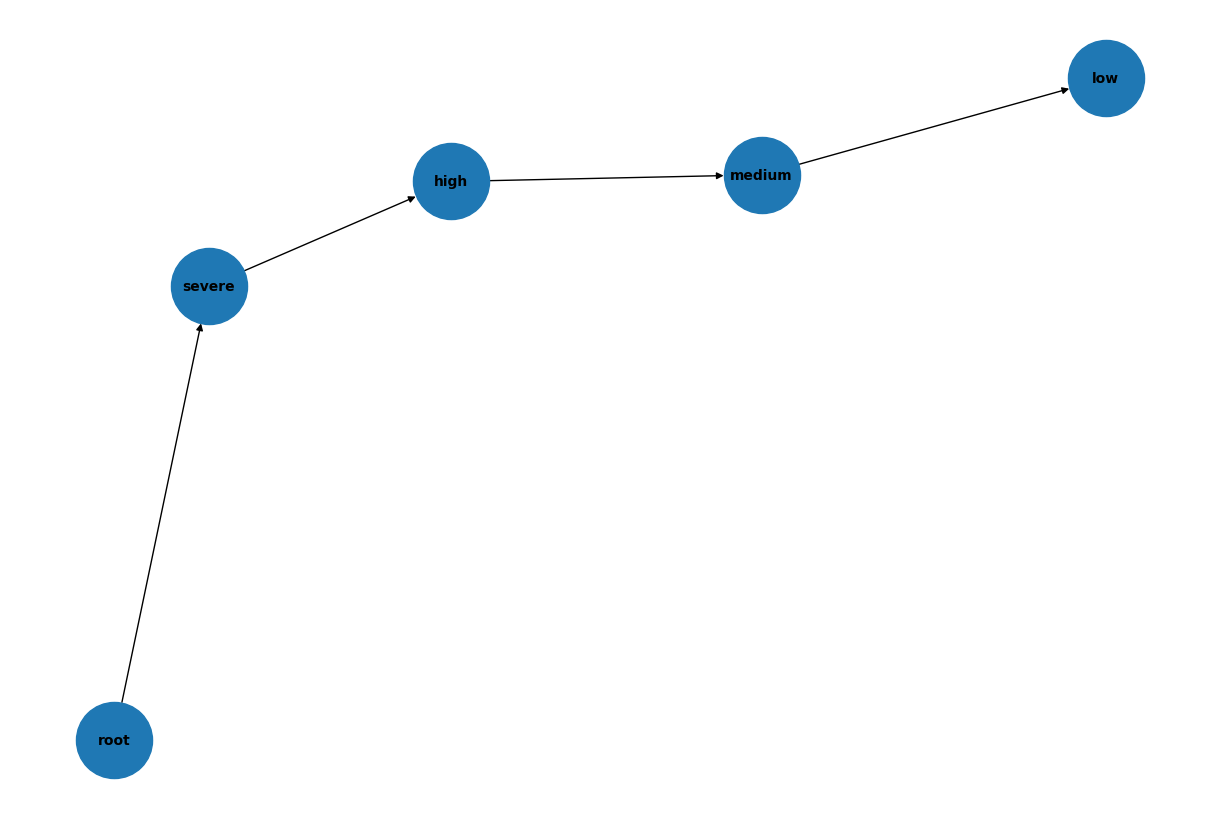

In [85]:
import matplotlib.pyplot as plt
import networkx as nx

# Visualize the tree
def visualize_tree(node, graph=None, parent=None):
    """
    Visualize the tree structure using NetworkX and Matplotlib.
    """
    if graph is None:
        graph = nx.DiGraph()
    if parent:
        graph.add_edge(parent.name, node.name)
    for child in node.children.values():
        visualize_tree(child, graph, parent=node)
    return graph

# Plot the tree
def plot_tree(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=3000, font_size=10, font_weight="bold")
    plt.show()

# Visualize the decision tree
tree_graph = visualize_tree(tree)
plot_tree(tree_graph)


In [93]:
import matplotlib.pyplot as plt
import networkx as nx

# Tree Node Definition
class TreeNode:
    def __init__(self, name=None, conditions=None):
        self.name = name
        self.conditions = conditions if conditions else []
        self.children = {}
        self.rule = None  # Rule (action) at the leaf node

# Build the Tree
def build_tree(severity_levels, condition_map):
    """
    Construct the tree for the given severity levels and conditions.
    Each node represents a severity level, and its children represent the next severity level.
    """
    root = TreeNode("root")
    current_level = [root]
    for severity in severity_levels:
        next_level = []
        for parent in current_level:
            # Create a child node for each severity level
            child = TreeNode(name=severity, conditions=condition_map.get(severity, []))
            parent.children[severity] = child
            next_level.append(child)
        current_level = next_level
    return root

# Assign Rules to Leaves
def assign_rules_to_leaves(node, path=None):
    """
    Assign detailed rules at the leaf nodes based on the path.
    """
    if path is None:
        path = []
    # If leaf node, assign a detailed action
    if not node.children:
        action_conditions = {level: ", ".join(child.conditions) for level, child in path}
        node.rule = f"""
        Action:
        - Severe Conditions: {action_conditions.get('severe', 'None')}
        - High Conditions: {action_conditions.get('high', 'None')}
        - Medium Conditions: {action_conditions.get('medium', 'None')}
        - Low Conditions: {action_conditions.get('low', 'None')}
        - Recommendation: Tailor management based on above conditions.
        """
        return
    # Traverse children
    for severity, child in node.children.items():
        assign_rules_to_leaves(child, path + [(severity, child)])

# Traverse the Tree
def traverse_tree(node, clusters, path=None):
    """
    Traverse the tree using the input clusters to find the rule at the matching leaf.
    Handles multiple conditions per severity level.
    """
    if path is None:
        path = []
    # If leaf node, return the rule
    if not node.children:
        return node.rule

    # Check each severity level and traverse if conditions match
    for severity, conditions in clusters.items():
        if severity in node.children:
            # Check if any input condition matches the node's conditions
            matching_conditions = [cond for cond in conditions if cond in node.children[severity].conditions]
            if matching_conditions:
                # Add matching conditions to the path and traverse
                return traverse_tree(node.children[severity], clusters, path + [(severity, node.children[severity])])
    
    # If no matching rule is found
    return "No matching rule found."

# Visualize the Tree
def visualize_tree(node, graph=None, parent=None):
    """
    Visualize the tree structure using NetworkX and Matplotlib.
    """
    if graph is None:
        graph = nx.DiGraph()
    if parent:
        graph.add_edge(parent.name, node.name)
    for child in node.children.values():
        visualize_tree(child, graph, parent=node)
    return graph

# Plot the Tree
def plot_tree(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=3000, font_size=10, font_weight="bold")
    plt.show()

# Define severity levels and condition map
severity_levels = ["severe", "high", "medium", "low"]
condition_map = {
    "severe": ["426783006"],
    "high": ["111975006"],
    "medium": ["39732003", "59931005"],
    "low": ["164889003"]
}

# Define input clusters for testing
test_clusters = [
    {"severe": ["426783006"], "high": [], "medium": ["39732003", "59931005"], "low": ["164889003"]},
    {"severe": ["426783006"], "high": ["111975006"], "medium": [], "low": ["59931005"]},
    {"severe": [], "high": ["111975006"], "medium": ["39732003"], "low": ["164889003"]},
]

# Build the tree
tree = build_tree(severity_levels, condition_map)

# Assign rules to the leaf nodes
assign_rules_to_leaves(tree)

In [94]:
for i, clusters in enumerate(test_clusters, 1):
    print(f"Test Case {i}:")
    action = traverse_tree(tree, clusters)
    print(action)
    print("=" * 50)

Test Case 1:
No matching rule found.
Test Case 2:
No matching rule found.
Test Case 3:
No matching rule found.


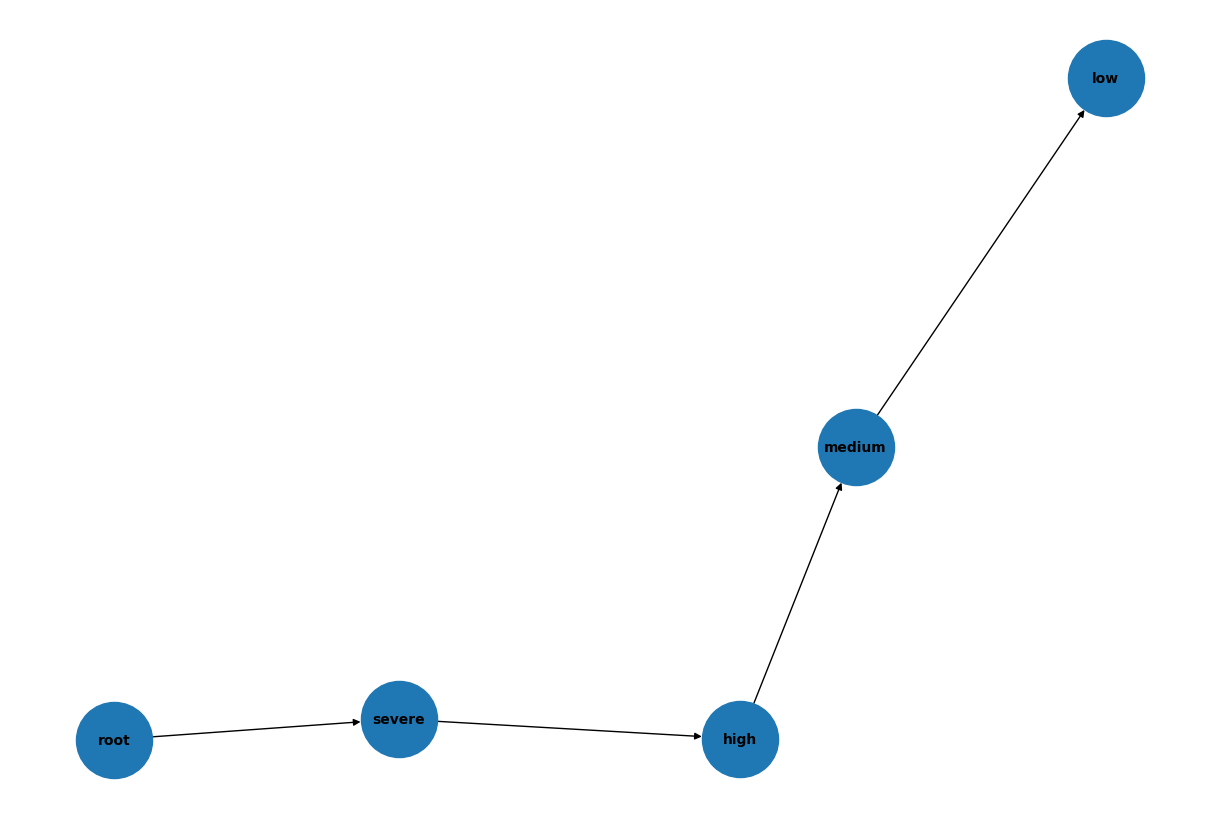

In [95]:
tree_graph = visualize_tree(tree)
plot_tree(tree_graph)

In [96]:
knowledge_base = {
    "10370003": {
        "name": "Rhythm from artificial pacing",
        "description": "An EKG rhythm resulting from an artificial pacemaker.",
        "confidence_threshold": 0.7,
        "recommendations": {
            "severe": "Monitor pacemaker settings",
            "medium": "Assess patient symptoms"
        }
    },
    "164889003": {
        "name": "ECG: Atrial Fibrillation",
        "description": "A common arrhythmia characterized by rapid and irregular beating of the atria.",
        "confidence_threshold": 0.8,
        "recommendations": {
            "severe": "Consider anticoagulants",
            "medium": "Rate control medications",
            "low": "Consult cardiology"
        }
    }
}


In [97]:
input_cluster = {
    "severe": ["10370003"],
    "medium": ["164889003"],
    "low": []
}


In [98]:
def get_recommendations(input_cluster, knowledge_base):
    """
    Retrieve recommendations based on input cluster and knowledge base.
    """
    recommendations = []

    # Iterate through severity levels in the input cluster
    for severity, conditions in input_cluster.items():
        for condition in conditions:
            # Lookup condition in the knowledge base
            if condition in knowledge_base:
                condition_info = knowledge_base[condition]
                # Retrieve recommendation for the severity level
                severity_rec = condition_info["recommendations"].get(severity)
                if severity_rec:
                    recommendations.append({
                        "condition": condition_info["name"],
                        "severity": severity,
                        "recommendation": severity_rec
                    })
    return recommendations

# Retrieve recommendations
recommendations = get_recommendations(input_cluster, knowledge_base)

# Print the results
for rec in recommendations:
    print(f"Condition: {rec['condition']}")
    print(f"Severity: {rec['severity']}")
    print(f"Recommendation: {rec['recommendation']}")
    print("=" * 50)


Condition: Rhythm from artificial pacing
Severity: severe
Recommendation: Monitor pacemaker settings
Condition: ECG: Atrial Fibrillation
Severity: medium
Recommendation: Rate control medications


In [99]:
def summarize_recommendations(recommendations):
    summary = {}
    for rec in recommendations:
        if rec["severity"] not in summary:
            summary[rec["severity"]] = []
        summary[rec["severity"]].append(rec["recommendation"])
    return summary

# Generate a summary
summary = summarize_recommendations(recommendations)
print(summary)


{'severe': ['Monitor pacemaker settings'], 'medium': ['Rate control medications']}


In [6]:
import json

with open('record_dict.json', 'w') as fp:
    json.dump(record_dict, fp)

TypeError: Object of type int64 is not JSON serializable